In [74]:
from k_means_const_manhattan import KMeansConstrained
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Creating the delivery Locations

In [75]:
def create_locations(x, y, n):
    loc = []

    for _ in range(n):
        loc_x = random.randint(int(x[0]), int(y[0])) + random.randint(int((x[0] - int(x[0]))*10000), int((y[0] - int(y[0]))*10000)) / 10000
        loc_y = random.randint(int(x[1]), int(y[1])) + random.randint(int((x[1] - int(x[1]))*10000), int((y[1] - int(y[1]))*10000)) / 10000
        loc.append([loc_x,loc_y])
        
    return loc

## Visualizing the data

In [76]:
def initial_plot(delivery_loc):
    loc = np.array(delivery_loc)
    plt.scatter(loc[:,0], loc[:,1])
    plt.title("Delivery Locations")
    plt.show()

In [77]:
def clusters_plot(clusters, centroids):
    for i in clusters:
        points = np.array(clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    plt.title("After Clustering")
    plt.show()

In [78]:
def dp_plot(clusters, centroids, dp):
    for i in clusters:
        points = np.array(clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    plt.scatter(dp[0], dp[1], marker='+',s=200, c="red")
    plt.title("After DP Creation")
    plt.show()

In [79]:
def final_plot(clusters, dp):
    colors = ['blue', 'green', 'orange', 'purple', 'brown']

    for i in clusters:
        pts = np.array(clusters[i])
        plt.scatter(pts[:,0], pts[:,1])
        #try
        points = pts[1:-1,:]
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try

        for j in range(len(pts)-1):
            pt_1 = pts[j]
            pt_2 = pts[j+1]

            # x axis
            f_pt = np.array([pt_1[0], pt_1[0]])
            s_pt = np.array([pt_1[1], pt_2[1]])

            # y axis
            t_pt = np.array([pt_1[0], pt_2[0]])
            l_pt = np.array([pt_2[1], pt_2[1]])

            plt.plot(f_pt, s_pt, c=colors[i % len(colors)])
            plt.plot(t_pt, l_pt, c=colors[i % len(colors)])

    plt.scatter(dp[0], dp[1], c="red", marker='X',s=200)
    plt.title("Final Result")
    plt.show()

## KMeans Clustering

In [80]:
def KMeans(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

In [81]:
from k_means_constrained import KMeansConstrained

def KMeans_Euclidian(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

## Calculate DP

In [82]:
def calculate_dp(centroids):
    x = [i for i,j in centroids]
    y = [j for i,j in centroids]

    loc_x = np.median(x)
    loc_y = np.median(y)

    return [loc_x, loc_y]

## Traveling Salesman Problem

In [83]:
def calculate_distance(point1, point2):
    return (abs(point1[0]-point2[0]) + abs(point1[1]-point2[1]))

In [84]:
def tsp(cluster, opt_dp):
    cluster.insert(0, opt_dp)
    unvisited = cluster.copy()
    tour = [opt_dp]
    unvisited.remove(opt_dp)

    while unvisited:
        nearest_point = min(unvisited, key=lambda x: calculate_distance(tour[-1], x))
        tour.append(nearest_point)
        unvisited.remove(nearest_point)

    # Return to the starting point to complete the cycle
    tour.append(opt_dp)
    
    return tour

In [85]:
from itertools import permutations

def tsp_brut(cluster, dp):
    path = list(permutations(cluster))
    cost = []
    # add dp at the start and end
    for i in range(len(path)):
        path[i] = list(path[i])
        path[i].append(dp)
        path[i].insert(0, dp)

        # Calculate distance
        points = path[i]
        sum = 0

        for j in range(len(path[i])-1):
            sum += calculate_distance(path[i][j], path[i][j+1])
        cost.append(sum)

    idx = np.argmin(cost)
    return path[idx]

## Main

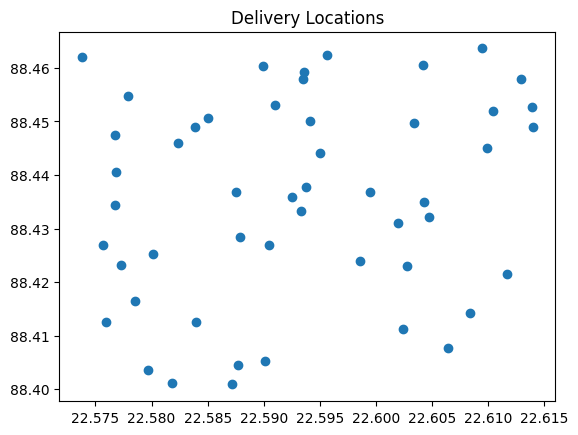

In [86]:
#no of delivery locations and drone capacity
n = 50
k = 5

# creating the boundary
x = [22.5726, 88.4010]
y = [22.6141, 88.4654]
delivery_loc = create_locations(x, y, n)

# Visualize the data
initial_plot(delivery_loc)

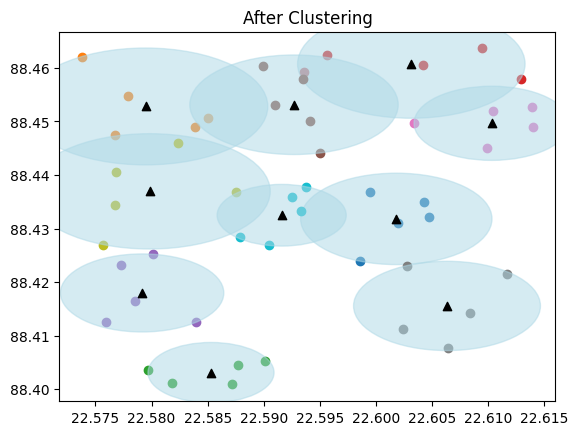

In [87]:
# Cluster the data and get the labels and centroids
centroids, clusters = KMeans(delivery_loc, n, k)

# Visualize the data
clusters_plot(clusters, centroids)

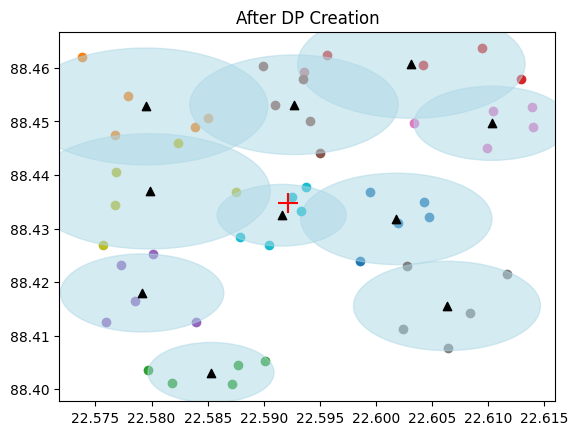

In [88]:
# Calculate DP
DP = calculate_dp(centroids)

# Visualize the data
dp_plot(clusters, centroids, DP)

In [89]:
# Shortest path calculation in each cluster
for i in clusters:
    clusters[i] = tsp(clusters[i], DP)


In [90]:
for i in clusters:
    print("Path",i,":")
    for j in clusters[i]:
        print(j,"->",end=" ")
    print("End")

Path 0 :
[22.59215, 88.43471] -> [22.5995, 88.4368] -> [22.6043, 88.435] -> [22.6047, 88.4322] -> [22.602, 88.4311] -> [22.5986, 88.4239] -> [22.59215, 88.43471] -> End
Path 1 :
[22.59215, 88.43471] -> [22.5839, 88.4489] -> [22.585, 88.4507] -> [22.5779, 88.4547] -> [22.5767, 88.4475] -> [22.5738, 88.4621] -> [22.59215, 88.43471] -> End
Path 2 :
[22.59215, 88.43471] -> [22.5901, 88.4053] -> [22.5877, 88.4046] -> [22.5872, 88.4009] -> [22.5818, 88.4012] -> [22.5797, 88.4036] -> [22.59215, 88.43471] -> End
Path 3 :
[22.59215, 88.43471] -> [22.5936, 88.4592] -> [22.5956, 88.4624] -> [22.6042, 88.4605] -> [22.6095, 88.4636] -> [22.6129, 88.4579] -> [22.59215, 88.43471] -> End
Path 4 :
[22.59215, 88.43471] -> [22.5801, 88.4252] -> [22.5773, 88.4232] -> [22.5785, 88.4164] -> [22.5759, 88.4125] -> [22.584, 88.4126] -> [22.59215, 88.43471] -> End
Path 5 :
[22.59215, 88.43471] -> [22.595, 88.4441] -> [22.5941, 88.4501] -> [22.591, 88.453] -> [22.5935, 88.4579] -> [22.5899, 88.4604] -> [22.59215

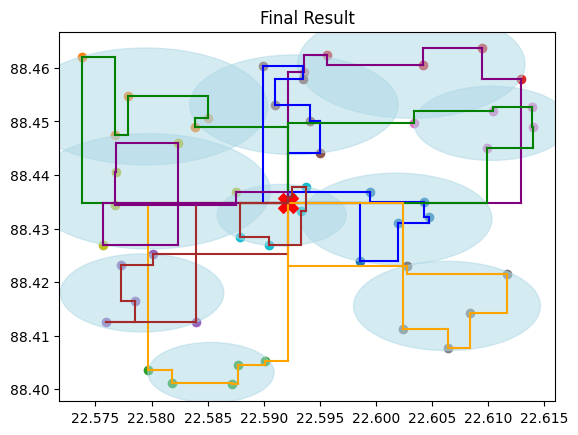

In [91]:
# Final Visualization
final_plot(clusters, DP)

## Calculate Total DIstance

In [92]:
def total_distance(clusters):
    total = 0
    for i in clusters:
        pts = clusters[i]
        for j in range(len(pts)-1):
            total += calculate_distance(pts[j], pts[j+1])
    
    return total

*Total distance in manhattan cluster*

In [93]:
dist_1 = total_distance(clusters)
print("Distance using manhattan cluster :",dist_1)

Distance using manhattan cluster : 0.7939800000000545


*Total distance in euclidian cluster*

Path 0 :
[22.59215, 88.43471] -> [22.5875, 88.4368] -> [22.5767, 88.4343] -> [22.5768, 88.4406] -> [22.5824, 88.446] -> [22.5757, 88.427] -> [22.59215, 88.43471] -> End
Path 1 :
[22.59215, 88.43471] -> [22.5995, 88.4368] -> [22.6043, 88.435] -> [22.6047, 88.4322] -> [22.602, 88.4311] -> [22.5986, 88.4239] -> [22.59215, 88.43471] -> End
Path 2 :
[22.59215, 88.43471] -> [22.5901, 88.4053] -> [22.5877, 88.4046] -> [22.5872, 88.4009] -> [22.5818, 88.4012] -> [22.5797, 88.4036] -> [22.59215, 88.43471] -> End
Path 3 :
[22.59215, 88.43471] -> [22.5936, 88.4592] -> [22.5956, 88.4624] -> [22.6042, 88.4605] -> [22.6095, 88.4636] -> [22.6129, 88.4579] -> [22.59215, 88.43471] -> End
Path 4 :
[22.59215, 88.43471] -> [22.5801, 88.4252] -> [22.5773, 88.4232] -> [22.5785, 88.4164] -> [22.5759, 88.4125] -> [22.584, 88.4126] -> [22.59215, 88.43471] -> End
Path 5 :
[22.59215, 88.43471] -> [22.5839, 88.4489] -> [22.585, 88.4507] -> [22.5779, 88.4547] -> [22.5767, 88.4475] -> [22.5738, 88.4621] -> [22.5921

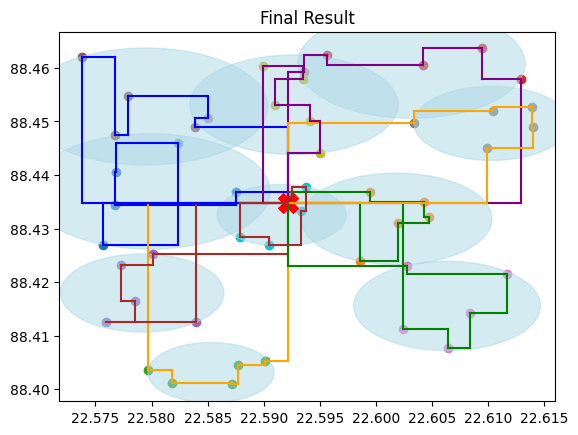

In [94]:
# Cluster the data and get the labels and centroids
centroids_2, clusters_2 = KMeans_Euclidian(delivery_loc, n, k)

# Calculate DP
DP_2 = calculate_dp(centroids_2)

# Shortest path calculation in each cluster
for i in clusters_2:
    clusters_2[i] = tsp(clusters_2[i], DP_2)

for i in clusters_2:
    print("Path",i,":")
    for j in clusters_2[i]:
        print(j,"->",end=" ")
    print("End")

dist_2 = total_distance(clusters_2)
print("\nDistance using euclidian cluster :",dist_2)

final_plot(clusters_2, DP_2)

*Approach 3 : Manhattan cluster with bruteforce TSP*

Path 0 :
[22.59264, 88.43576] -> [22.5757, 88.427] -> [22.5767, 88.4343] -> [22.5768, 88.4406] -> [22.5824, 88.446] -> [22.5875, 88.4368] -> [22.59264, 88.43576] -> End
Path 1 :
[22.59264, 88.43576] -> [22.595, 88.4441] -> [22.6099, 88.4451] -> [22.614, 88.4489] -> [22.6034, 88.4497] -> [22.5941, 88.4501] -> [22.59264, 88.43576] -> End
Path 2 :
[22.59264, 88.43576] -> [22.5797, 88.4036] -> [22.5818, 88.4012] -> [22.5872, 88.4009] -> [22.5877, 88.4046] -> [22.5901, 88.4053] -> [22.59264, 88.43576] -> End
Path 3 :
[22.59264, 88.43576] -> [22.591, 88.453] -> [22.5899, 88.4604] -> [22.5956, 88.4624] -> [22.5936, 88.4592] -> [22.5935, 88.4579] -> [22.59264, 88.43576] -> End
Path 4 :
[22.59264, 88.43576] -> [22.6043, 88.435] -> [22.6047, 88.4322] -> [22.602, 88.4311] -> [22.5995, 88.4368] -> [22.5938, 88.4378] -> [22.59264, 88.43576] -> End
Path 5 :
[22.59264, 88.43576] -> [22.6028, 88.4231] -> [22.6117, 88.4215] -> [22.6084, 88.4143] -> [22.6064, 88.4077] -> [22.6024, 88.4112] -> [22.59264,

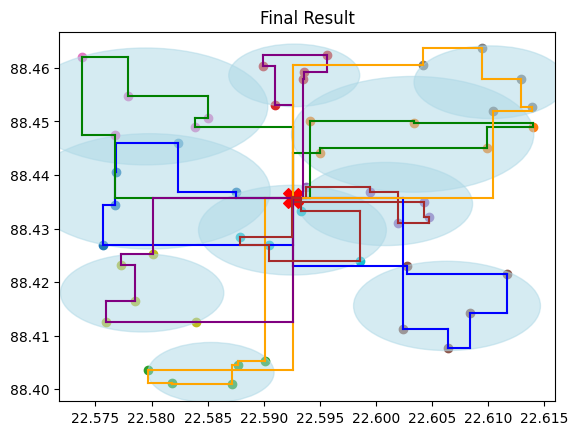

In [95]:
# Cluster the data and get the labels and centroids
centroids_3, clusters_3 = KMeans(delivery_loc, n, k)

# Calculate DP
DP_3 = calculate_dp(centroids_3)

# Shortest path calculation in each cluster
for i in clusters_3:
    clusters_3[i] = tsp_brut(clusters_3[i], DP_3)

for i in clusters_3:
    print("Path",i,":")
    for j in clusters_3[i]:
        print(j,"->",end=" ")
    print("End")

dist_3 = total_distance(clusters_3)
print("\nDistance using manhattan cluster and bruteforce TSP :",dist_3)

final_plot(clusters_3, DP_3)

*Approach 4 : Euclidean cluster with bruteforce TSP*

Path 0 :
[22.59348, 88.43471] -> [22.591, 88.453] -> [22.5941, 88.4501] -> [22.6034, 88.4497] -> [22.6099, 88.4451] -> [22.595, 88.4441] -> [22.59348, 88.43471] -> End
Path 1 :
[22.59348, 88.43471] -> [22.584, 88.4126] -> [22.5759, 88.4125] -> [22.5785, 88.4164] -> [22.5773, 88.4232] -> [22.5801, 88.4252] -> [22.59348, 88.43471] -> End
Path 2 :
[22.59348, 88.43471] -> [22.5839, 88.4489] -> [22.585, 88.4507] -> [22.5779, 88.4547] -> [22.5738, 88.4621] -> [22.5767, 88.4475] -> [22.59348, 88.43471] -> End
Path 3 :
[22.59348, 88.43471] -> [22.5986, 88.4239] -> [22.602, 88.4311] -> [22.6047, 88.4322] -> [22.6043, 88.435] -> [22.5995, 88.4368] -> [22.59348, 88.43471] -> End
Path 4 :
[22.59348, 88.43471] -> [22.614, 88.4489] -> [22.6139, 88.4526] -> [22.6129, 88.4579] -> [22.6095, 88.4636] -> [22.6104, 88.4519] -> [22.59348, 88.43471] -> End
Path 5 :
[22.59348, 88.43471] -> [22.5757, 88.427] -> [22.5767, 88.4343] -> [22.5768, 88.4406] -> [22.5824, 88.446] -> [22.5875, 88.4368] -> [22.59348, 8

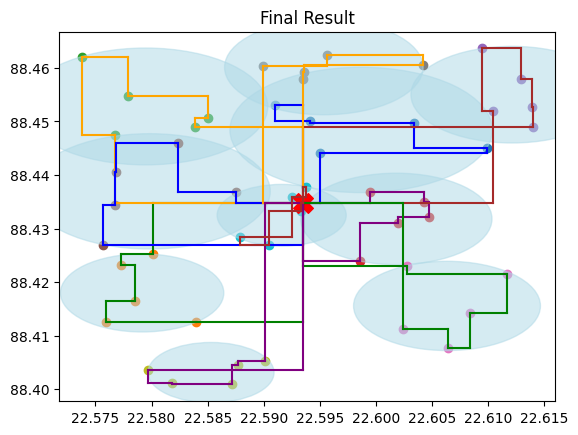

In [96]:
# Cluster the data and get the labels and centroids
centroids_4, clusters_4 = KMeans_Euclidian(delivery_loc, n, k)

# Calculate DP
DP_4 = calculate_dp(centroids_4)

# Shortest path calculation in each cluster
for i in clusters_4:
    clusters_4[i] = tsp_brut(clusters_4[i], DP_4)

for i in clusters_4:
    print("Path",i,":")
    for j in clusters_4[i]:
        print(j,"->",end=" ")
    print("End")

dist_4 = total_distance(clusters_4)
print("\nDistance using euclidean cluster and bruteforce TSP :",dist_4)

final_plot(clusters_4, DP_4)

In [97]:
#Results

print("Distance using manhattan cluster and non-bruteforce TSP :",dist_1)
print("Distance using euclidean cluster and non-bruteforce TSP :",dist_2)
print("Distance using manhattan cluster and bruteforce TSP :",dist_3)
print("Distance using euclidean cluster and bruteforce TSP :",dist_4)

Distance using manhattan cluster and non-bruteforce TSP : 0.7939800000000545
Distance using euclidean cluster and non-bruteforce TSP : 0.7939800000000545
Distance using manhattan cluster and bruteforce TSP : 0.7538800000000165
Distance using euclidean cluster and bruteforce TSP : 0.7783400000000071


*<font color="red">failed attempt</font>*

In [98]:
import networkx as nx

def create_graph(edges):
    graph = nx.MultiGraph()
    for edge in edges:
        graph.add_edge(edge[0], edge[1])
    return graph

def find_eulerian_circuit(graph):
    return list(nx.eulerian_circuit(graph))

def calculate_distance(point1, point2):
    return (abs(point1[0] - point2[0]) + abs(point1[1] - point2[1]))

def create_minimum_spanning_tree(points):
    # Create a graph
    G = nx.Graph()
    # Add nodes
    for i, point in enumerate(points):
        G.add_node(i, pos=point)
    # Add edges based on distances
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            distance = calculate_distance(points[i], points[j])
            G.add_edge(i, j, weight=distance)
    # Compute the minimum spanning tree
    mst = nx.minimum_spanning_tree(G)
    return mst

def find_perfect_matching(odd_degree_vertices, distances):
    # Implement Blossom V algorithm to find perfect matching
    # (You may need to install networkx library for this)
    G = nx.Graph()
    # Add odd degree vertices
    for vertex in odd_degree_vertices:
        G.add_node(vertex)
    # Add edges with corresponding weights
    for i in range(len(odd_degree_vertices)):
        for j in range(i+1, len(odd_degree_vertices)):
            v1 = odd_degree_vertices[i]
            v2 = odd_degree_vertices[j]
            # weight = distances[v1][v2]
            weight = distances[(v1, v2)]
            G.add_edge(v1, v2, weight=weight)
    # Compute maximum matching
    matching = nx.max_weight_matching(G, maxcardinality=True)
    # Extract edges from matching
    matching_edges = [(min(u, v), max(u, v)) for u, v in matching]
    return matching_edges

def convert_to_eulerian_circuit(tree_edges, matching_edges):
    graph = create_graph(tree_edges + matching_edges)  # Combine edges into a multigraph
    eulerian_circuit = find_eulerian_circuit(graph)  # Use Hierholzer's algorithm
    return eulerian_circuit

def shortcut_circuit(eulerian_circuit):
    tour = []
    for vertex in eulerian_circuit:
        if vertex not in tour:
            tour.append(vertex)
    return tour

def create_distance_matrix(points):
    distances = {}
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            distances[(i, j)] = calculate_distance(points[i], points[j])
            distances[(j, i)] = distances[(i, j)]  # Since it's undirected
    return distances

def christofides_tsp(points, opt_dp):
    cluster = points.copy()
    cluster.insert(0, opt_dp)  # Add depot to the cluster

    # 1. Create a minimum spanning tree
    mst = create_minimum_spanning_tree(cluster)

    # 2. Find vertices with odd degree in the MST
    odd_degree_vertices = [vertex for vertex, degree in mst.degree() if degree % 2 == 1]

    # 3. Find a minimum-weight perfect matching for odd-degree vertices
    distances = create_distance_matrix(cluster)  # Precalculate distances
    print(distances)
    matching_edges = find_perfect_matching(odd_degree_vertices, distances)

    # 4. Combine MST edges and matching edges to create an Eulerian circuit
    eulerian_circuit = convert_to_eulerian_circuit(mst.edges(), matching_edges)

    # 5. Shortcut the Eulerian circuit to form a Hamiltonian circuit (TSP tour)
    tour = shortcut_circuit(eulerian_circuit)

    return tour